In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.tsa.api as smt
import statsmodels.stats.api as sms
import statsmodels.api as sm
import scipy.stats as scs
import math

In [2]:
def tsplot(y, lags=None, figsize=(10, 8), style='bmh'):
    """Helpful function to plot timeseries"""
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return 

In [3]:
def OSR2(predictions, train, test):
    sse = sum((test - predictions)**2)
    sst = sum((test - np.mean(train))**2)
    r2 = 1 - sse/sst
    
    return r2

In [4]:
df = pd.read_csv("data_VOO.csv")   # change dataset name

In [5]:
df.head()

,Unnamed: 0,timestamp,open,high,low,close,volume,time,EMA,time.1,RSI,time.2,MFI
0,0,2019-04-15,266.57,266.64,265.4676,266.30,1584541,2019-04-15,263.4576,2019-04-15,68.5896,2019-04-15,78.3429
1,1,2019-04-12,266.33,266.77,265.6300,266.48,1903391,2019-04-12,263.0203,2019-04-12,69.4073,2019-04-12,84.6735
2,2,2019-04-11,265.24,265.24,264.0900,264.69,1567704,2019-04-11,262.4881,2019-04-11,65.6232,2019-04-11,76.1323
3,3,2019-04-10,264.25,264.84,263.8500,264.74,2990910,2019-04-10,262.1493,2019-04-10,65.8344,2019-04-10,65.5640
4,4,2019-04-09,264.22,264.54,263.2910,263.83,2016861,2019-04-09,261.7507,2019-04-09,63.8691,2019-04-09,65.4935


In [6]:
# interested in 1-day close price
close = df.close
close.name = 'close'
close.head()

0    266.30
1    266.48
2    264.69
3    264.74
4    263.83
Name: close, dtype: float64

In [7]:
len(close)

2150

In [8]:
train = close.loc[:len(close) -  int(len(close)*0.15) -1]
test = close.loc[len(close) -  int(len(close)*0.15):]
print(train.tail())
print(test.head())

1823    59.00
1824    59.25
1825    59.12
1826    59.06
1827    58.56
Name: close, dtype: float64
1828    58.47
1829    58.59
1830    58.40
1831    58.30
1832    57.45
Name: close, dtype: float64


Text(0,0.5,'1-day close price of train set')

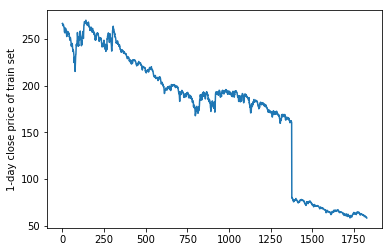

In [9]:
# is 1-day close price  stationary?
train.plot()
plt.ylabel('1-day close price of train set')

Text(0,0.5,'1-day close price of test set')

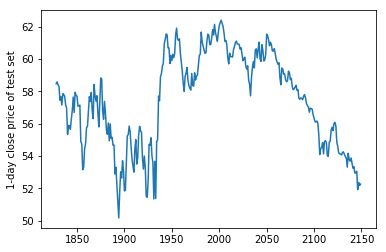

In [10]:
test.plot()
plt.ylabel('1-day close price of test set')

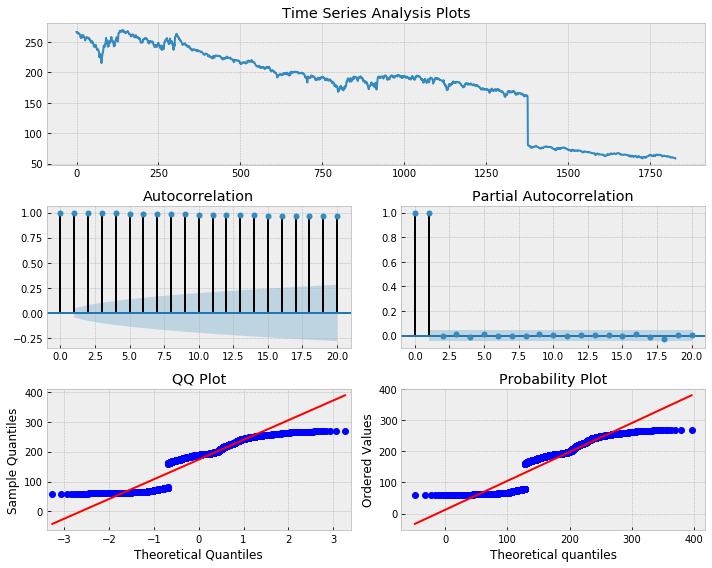

In [11]:
tsplot(train, lags=20)

In [12]:
# Augmented Dickey-Fuller unit root test
smt.adfuller(train, maxlag=20)
# first value is test statistic. Second value is the p-value
# p-value is not small enough to reject the null-hypothesis that the TS is non-stationary

(-0.45032418533549645,
 0.9013513318948645,
 0,
 1827,
 {'1%': -3.433934297502219,
  '5%': -2.8631232673540117,
  '10%': -2.5676128776645637},
 8337.237041487842)

Text(0,0.5,'Difference in 1-day close price')

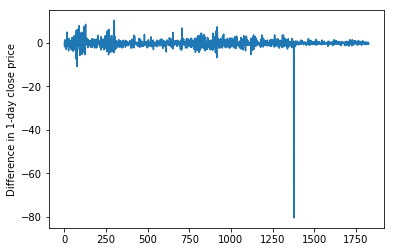

In [13]:
# are the difference between two 1-day close price stationary?
train_diff = train.diff().dropna()
train_diff.name = 'train close diff'
train_diff.plot()
plt.ylabel('Difference in 1-day close price')

In [14]:
# Augmented Dickey-Fuller unit root test
smt.adfuller(train_diff, maxlag=20)
# first value is test statistic. Second value is the p-value
# p-value is small enough to reject the null-hypothesis that the TS is non-stationary

(-42.757840730908136,
 0.0,
 0,
 1826,
 {'1%': -3.433936263195097,
  '5%': -2.8631241351249,
  '10%': -2.5676133397235263},
 8333.675308155953)

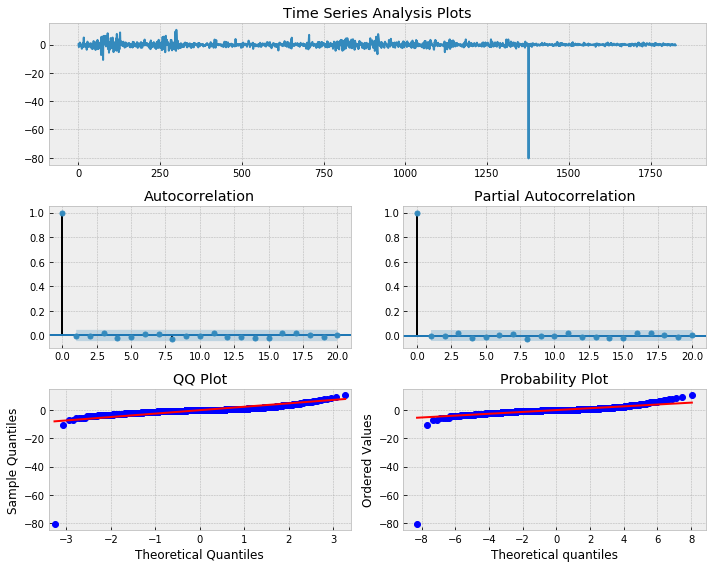

In [15]:
tsplot(train_diff, lags=20)

### Fit Model

In [16]:
arima010 = smt.ARIMA(train, (0,1,0)) #第一个AR， 第二个d，第三个MA  change parameters & model name
arima010_fit = arima010.fit() #change model name*2
arima010_fit.summary() #change model name

/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.close   No. Observations:                 1827
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -4207.282
Method:                           css   S.D. of innovations              2.420
Date:                Wed, 17 Apr 2019   AIC                           8418.563
Time:                        14:39:34   BIC                           8429.584
Sample:                             1   HQIC                          8422.628
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1137      0.057     -2.008      0.045      -0.225      -0.003
==============================================================================
"""

In [17]:
arima110 = smt.ARIMA(train, (1,1,0)) #第一个AR， 第二个d，第三个MA  change parameters & model name
arima110_fit = arima110.fit() #change model name*2
arima110_fit.summary() #change model name

/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.close   No. Observations:                 1827
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -4207.280
Method:                       css-mle   S.D. of innovations              2.420
Date:                Wed, 17 Apr 2019   AIC                           8420.561
Time:                        14:39:53   BIC                           8437.092
Sample:                             1   HQIC                          8426.658
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1137      0.057     -2.010      0.045      -0.225      -0.003
ar.L1.D.close    -0.0012      0.023     -0.050      0.960      -0.047       0.045
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1         -861.0175           +0.0000j          861.0175            0.5000
-----------------------------------------------------------------------------
"""

In [18]:
arima011 = smt.ARIMA(train, (0,1,1)) #第一个AR， 第二个d，第三个MA  change parameters & model name
arima011_fit = arima011.fit() #change model name*2
arima011_fit.summary() #change model name

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.close   No. Observations:                 1827
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -4207.280
Method:                       css-mle   S.D. of innovations              2.420
Date:                Wed, 17 Apr 2019   AIC                           8420.561
Time:                        14:41:14   BIC                           8437.092
Sample:                             1   HQIC                          8426.658
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1137      0.057     -2.010      0.045      -0.225      -0.003
ma.L1.D.close    -0.0012      0.024     -0.050      0.960      -0.047       0.045
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1          848.3031           +0.0000j          848.3031            0.0000
-----------------------------------------------------------------------------
"""

### Analyze residuals

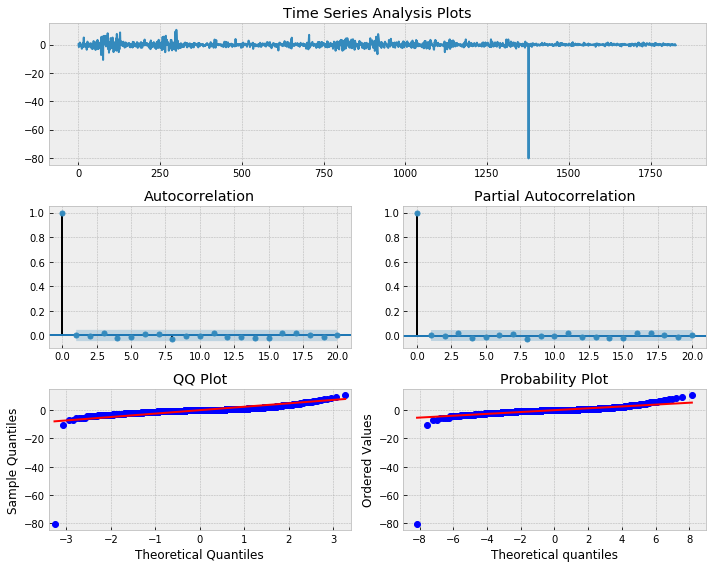

In [19]:
tsplot(arima011_fit.resid, lags=20) #change model name

### Test for remaining autocorrelation

In [20]:
# Ljung box test for remaining autocorrelation
sms.diagnostic.acorr_ljungbox(arima011_fit.resid, lags=(5,)) # or 10 lags       #change model name
#第二个是p-value  p值大于5%,序列为白噪声

(array([1.96807475]), array([0.85354464]))

### Forecasting

In [21]:
num_steps = 5
forecast_mean, forecast_std, forecast_ci = arima011_fit.forecast(steps=num_steps)   #change model name

/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


In [22]:
arima011_fit.forecast(steps=num_steps)   #change model name

/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


(array([58.44674977, 58.33304424, 58.21933871, 58.10563319, 57.99192766]),
 array([2.42031298, 3.42082258, 4.18881121, 4.83634692, 5.40688114]),
 array([[53.70302349, 63.19047605],
        [51.62835519, 65.0377333 ],
        [50.00941961, 66.42925781],
        [48.62656741, 67.58469896],
        [47.39463535, 68.58921996]]))

In [23]:
arima011_fit.forecast(steps=num_steps)[0][4]    #change model name

/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


57.99192765761745

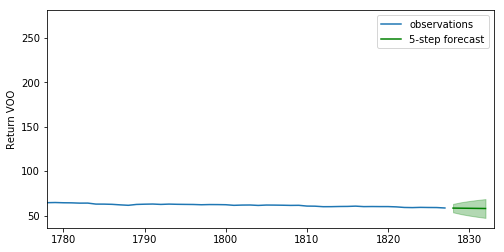

In [24]:
plt.figure(figsize=(8, 4))


plt.plot(train, label='observations')

forecast_steps = range(len(train), len(train) + num_steps)
plt.fill_between(forecast_steps, forecast_ci[:,0], forecast_ci[:,1], color='g', alpha=0.3)
plt.plot(forecast_steps, forecast_mean, label='5-step forecast', color='g')
plt.xlim([len(train) - 50, len(train) + num_steps])
plt.ylabel('Return VOO')   #change stock name
plt.legend()

### Calculate the performance metrics on test set

In [25]:
pred = []
for i in range( int(len(close)*0.15)): 
    moving_train = close.loc[:len(close) -  int(len(close)*0.15) -5 + i]
    moving_arima011 = smt.ARIMA(moving_train, (0,1,1))   #change model parameters  & model name
    moving_arima011_fit = moving_arima011.fit()   #change model name*2
    
    pred.append(moving_arima011_fit.forecast(steps=5)[0][4]) #change model name

len(pred)

/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


322

In [26]:
print( "OSR2 = " + str(OSR2(pred, train, test)))
print( "MAE = " + str(np.mean(abs(pred - test))))
print( "RMSE = " + str(math.sqrt(np.mean((pred - test)**2))))
print( "Scaled MAE = " + str(np.mean(abs(pred - test))/(max(test)-min(test))))
print( "Scaled RMSE = " + str(math.sqrt(np.mean((pred - test)**2))/(max(test)-min(test))))

OSR2 = 0.9998067872963092
MAE = 1.1510251398174915
RMSE = 1.6121987483492302
Scaled MAE = 0.09411489287142207
Scaled RMSE = 0.13182328277589783
